In [3]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

# from google.colab import drive
# drive.mount('/content/drive')

# attempts = ["/content/drive/My Drive/Table 4/Data/foil_trial_1.txt", "/content/drive/My Drive/Table 4/Data/foil_trial_2.txt"]

attempts = ["Data/foil_trial_1.txt", "Data/foil_trial_2.txt", "Data/foil_trial_3.txt",                          # foil (3)
            "Data/cardboard_trial_1.txt", "Data/cardboard_trial_2.txt", "Data/cardboard_trial_3.txt",           # cardboard (3)
            "Data/styrofoam_trial_1.txt", "Data/styrofoam_trial_2.txt", "Data/styrofoam_trial_3.txt",           # styrofoam (3)
            "Data/bubblewrap_trial_1.txt", "Data/bubblewrap_trial_2.txt", "Data/bubblewrap_trial_3.txt"]        # bubblewrap (3)

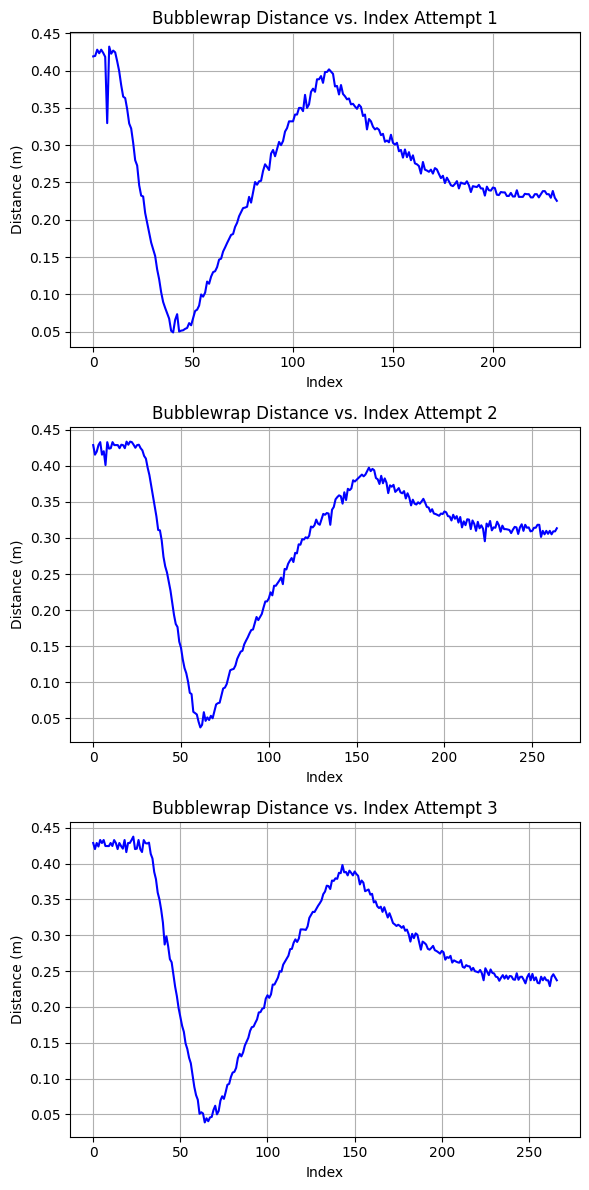

In [4]:
#### bubblewrap ATTEMPTS
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one'], ['two'], ['three']], figsize=(6, 12))

for plot_index in plots:
    read_in_array = np.loadtxt(attempts[plots.index(plot_index) + 9], delimiter=',')

    # Extract time, position, x-axis accelerometer output
    time_millis = read_in_array[:,0]
    dist_cm = read_in_array[:,1]
    # accel_x_output = read_in_array[:,2]

    # Time from ms to s, distance from cm to m
    time_s = time_millis/1000
    time_s = time_s - time_s[0]
    dist_m = dist_cm/100

    # Replace arange statement with 'time_s - time_s[0]' for dist. v time
    axes[plot_index].plot(np.arange(len(time_s)), dist_m, label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Bubblewrap Distance vs. Index Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Index")
    axes[plot_index].set_ylabel("Distance (m)")

    axes[plot_index].grid()

plt.tight_layout()
plt.show()

In [5]:
## ----- Calibrating the accelerometer ------ ##

# Load in the data
read_in_array_x = np.loadtxt('Data/project_x_calibration.txt', delimiter = ',')
read_in_array_y = np.loadtxt('Data/project_y_calibration.txt', delimiter = ',')
read_in_array_z = np.loadtxt('Data/project_z_calibration.txt', delimiter = ',')

# Extract the time, distance, and accelerometer outputs in the x, y, and z directions
x_calibration_time = read_in_array_x[:,0] / 1000
x_calibration_dist = read_in_array_x[:,1] / 100
x_calibration_ax = read_in_array_x[:,2]
x_calibration_ay = read_in_array_x[:,3]
x_calibration_az = read_in_array_x[:,4]

y_calibration_time = read_in_array_y[:,0] / 1000
y_calibration_dist = read_in_array_y[:,1] / 100
y_calibration_ax = read_in_array_y[:,2]
y_calibration_ay = read_in_array_y[:,3]
y_calibration_az = read_in_array_y[:,4]

z_calibration_time = read_in_array_z[:,0] / 1000
z_calibration_dist = read_in_array_z[:,1] / 100
z_calibration_ax = read_in_array_z[:,2]
z_calibration_ay = read_in_array_z[:,3]
z_calibration_az = read_in_array_z[:,4]

# True accelerations along x, y, z directions
x_calibration_true_ax = np.ones(len(read_in_array_x)) * -9.81
x_calibration_true_ay = np.zeros(len(read_in_array_x))
x_calibration_true_az = np.zeros(len(read_in_array_x))

y_calibration_true_ax = np.zeros(len(read_in_array_y))
y_calibration_true_ay = np.ones(len(read_in_array_y)) * -9.81
y_calibration_true_az = np.zeros(len(read_in_array_y))

z_calibration_true_ax = np.zeros(len(read_in_array_z))
z_calibration_true_ay = np.zeros(len(read_in_array_z))
z_calibration_true_az = np.ones(len(read_in_array_z)) * -9.81

# Calibrate
output_ax = np.append(x_calibration_ax, np.append(y_calibration_ax, z_calibration_ax))
true_ax = np.append(x_calibration_true_ax, np.append(y_calibration_true_ax, z_calibration_true_ax))

coeff_x, cov_x = np.polyfit(output_ax, true_ax, 1, cov=True)

## Function to convert normal x-axis accelerometer data to calibrated data ##
def output_to_accel_x(coeff_x, output):
    accel =  coeff_x[0] * output + coeff_x[1]
    return accel
# Calculate relative acceleration

# rel_accel = output_to_accel_x(coeff_x, accel_x_output) + 9.8

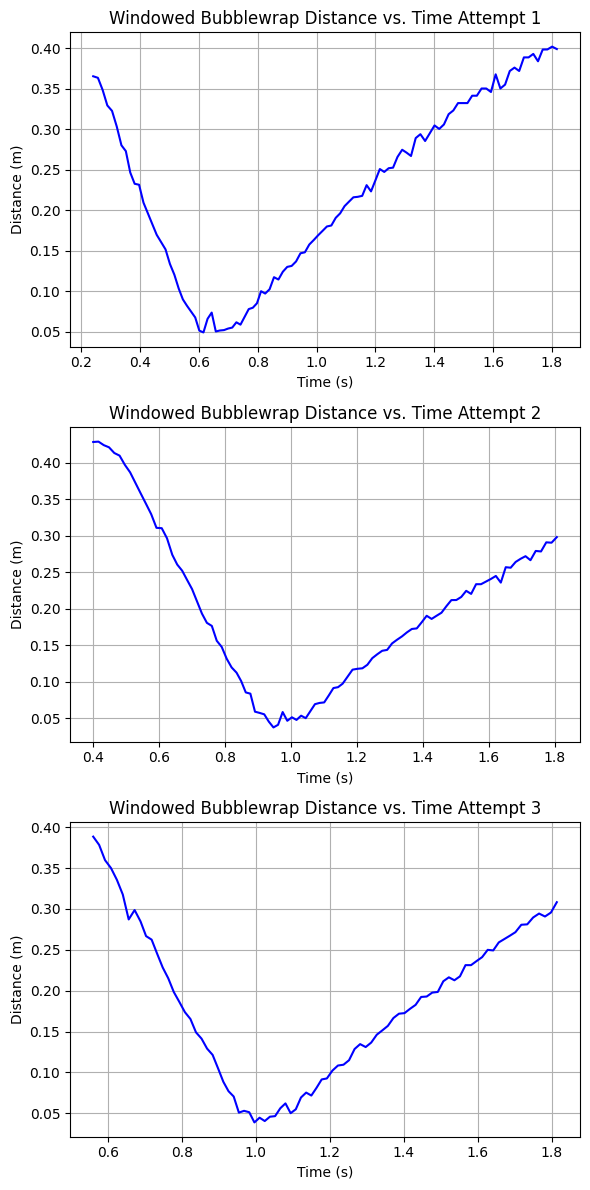

In [6]:
start_index_bubblewrap = [15, 25, 35]
stop_index_bubblewrap = [120, 120, 120]
time_windows_bubblewrap = []
dist_windows_bubblewrap = []
accel_windows_bubblewrap = []

## bubblewrap -- Windowed distance ##
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one'], ['two'], ['three']], figsize=(6, 12))
for plot_index in plots:
    read_in_array = np.loadtxt(attempts[plots.index(plot_index) + 9], delimiter=',')

    # Extract time, position, x-axis accelerometer output
    time_millis = read_in_array[:,0]
    dist_cm = read_in_array[:,1]
    accel_x_output = read_in_array[:,2]
    accel_x_output = output_to_accel_x(coeff_x, accel_x_output)
    accel_x_output = accel_x_output[start_index_bubblewrap[plots.index(plot_index)]:stop_index_bubblewrap[plots.index(plot_index)]]
    accel_windows_bubblewrap.append(accel_x_output)

    # Time from ms to s, distance from cm to m
    time_s = time_millis/1000
    time_s = time_s - time_s[0]
    dist_m = dist_cm/100

    time_window = time_s[start_index_bubblewrap[plots.index(plot_index)]:stop_index_bubblewrap[plots.index(plot_index)]]
    dist_window = dist_m[start_index_bubblewrap[plots.index(plot_index)]:stop_index_bubblewrap[plots.index(plot_index)]]
    time_windows_bubblewrap.append(time_window)
    dist_windows_bubblewrap.append(dist_window)

    # Replace arange statement with 'time_s - time_s[0]' for dist. v time
    axes[plot_index].plot(time_window, dist_window, label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Windowed Bubblewrap Distance vs. Time Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Time (s)")
    axes[plot_index].set_ylabel("Distance (m)")

    axes[plot_index].grid()

plt.tight_layout()
plt.show()

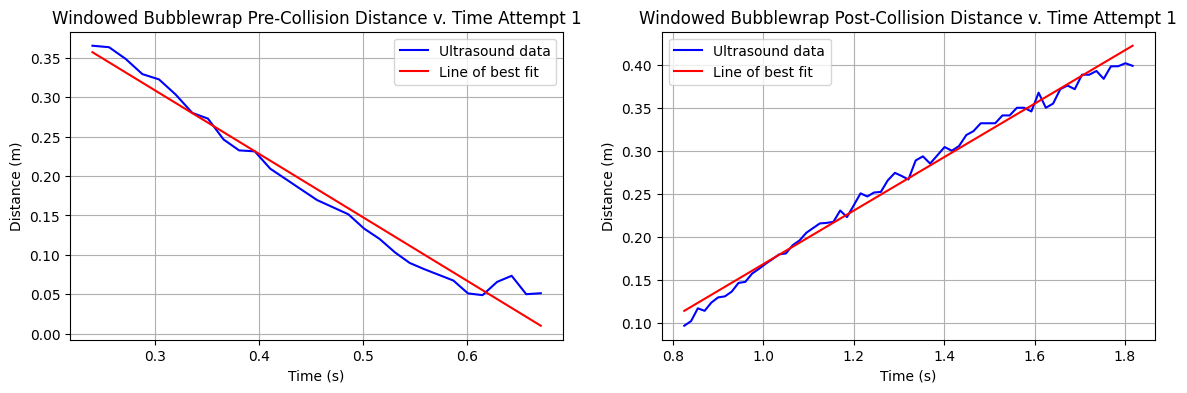

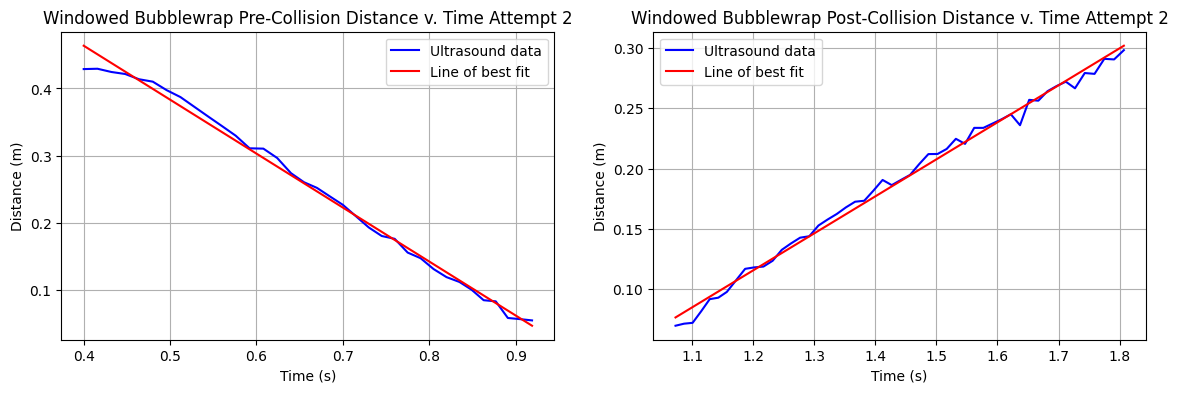

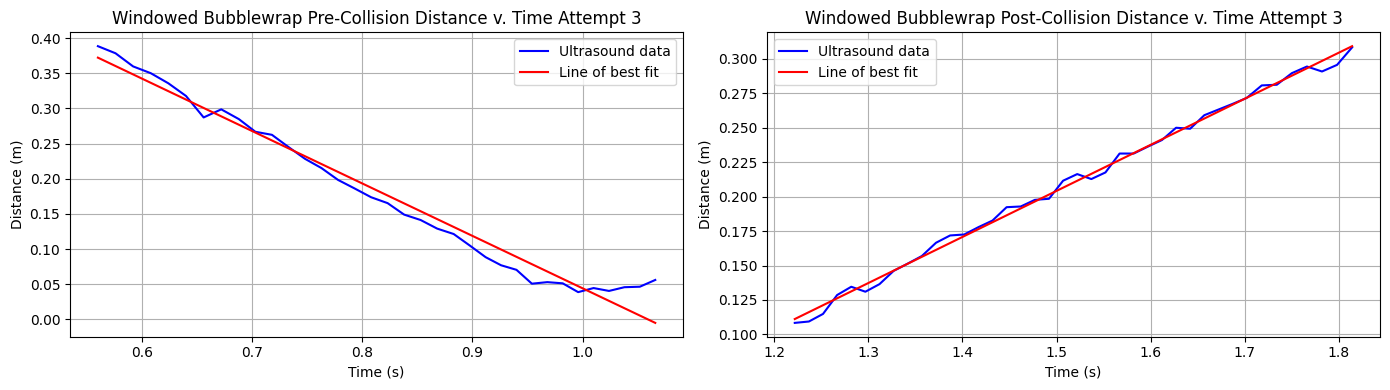

In [7]:
collision_index_start_bubblewrap = [45, 60, 70]
collision_index_stop_bubblewrap = [55, 70, 80]

time_window_pre_collision = []
dist_window_pre_collision = []

time_window_post_collision = []
dist_window_post_collision = []

coeff_linear_pre_collision = []
coeff_linear_post_collision = []

cov_linear_pre_collision = []
cov_linear_post_collision = []

y_fit_pre_collision = []
y_fit_post_collision = []

# for loop for collision indices
for i in range(3):
    time_window_pre_collision.append(time_windows_bubblewrap[i][:collision_index_start_bubblewrap[i] - start_index_bubblewrap[i]])
    time_window_post_collision.append(time_windows_bubblewrap[i][collision_index_stop_bubblewrap[i] - start_index_bubblewrap[i]:])

    dist_window_pre_collision.append(dist_windows_bubblewrap[i][:collision_index_start_bubblewrap[i] - start_index_bubblewrap[i]])
    dist_window_post_collision.append(dist_windows_bubblewrap[i][collision_index_stop_bubblewrap[i] - start_index_bubblewrap[i]:])

# for loop for best-fit lines
for i in range(3):
    coeff_linear_pre, cov_linear_pre = np.polyfit(time_window_pre_collision[i], dist_window_pre_collision[i], 1, cov=True)
    y_fit_pre = coeff_linear_pre[0]*time_window_pre_collision[i] + coeff_linear_pre[1]
    coeff_linear_pre_collision.append(coeff_linear_pre)
    cov_linear_pre_collision.append(cov_linear_pre)
    y_fit_pre_collision.append(y_fit_pre)

    coeff_linear_post, cov_linear_post = np.polyfit(time_window_post_collision[i], dist_window_post_collision[i], 1, cov=True)
    y_fit_post = coeff_linear_post[0]*time_window_post_collision[i] + coeff_linear_post[1]
    coeff_linear_post_collision.append(coeff_linear_post)
    cov_linear_post_collision.append(cov_linear_post)
    y_fit_post_collision.append(y_fit_post)

    plots = ['one', 'two']
    fig, axes = plt.subplot_mosaic([['one', 'two']], figsize=(14, 4))
    axes[plots[0]].plot(time_window_pre_collision[i], dist_window_pre_collision[i], label="Ultrasound data", color="b")
    axes[plots[0]].plot(time_window_pre_collision[i], y_fit_pre, color="r", label="Line of best fit")
    axes[plots[0]].set_title("Windowed Bubblewrap Pre-Collision Distance v. Time Attempt {attempt}".format(attempt = i + 1))
    axes[plots[0]].set_xlabel("Time (s)")
    axes[plots[0]].set_ylabel("Distance (m)")
    axes[plots[0]].grid()
    axes[plots[0]].legend()

    axes[plots[1]].plot(time_window_post_collision[i], dist_window_post_collision[i], label="Ultrasound data", color="b")
    axes[plots[1]].plot(time_window_post_collision[i], y_fit_post, color="r", label="Line of best fit")
    axes[plots[1]].set_title("Windowed Bubblewrap Post-Collision Distance v. Time Attempt {attempt}".format(attempt = i + 1))
    axes[plots[1]].set_xlabel("Time (s)")
    axes[plots[1]].set_ylabel("Distance (m)")
    axes[plots[1]].grid()
    axes[plots[1]].legend()

plt.tight_layout()
plt.show()


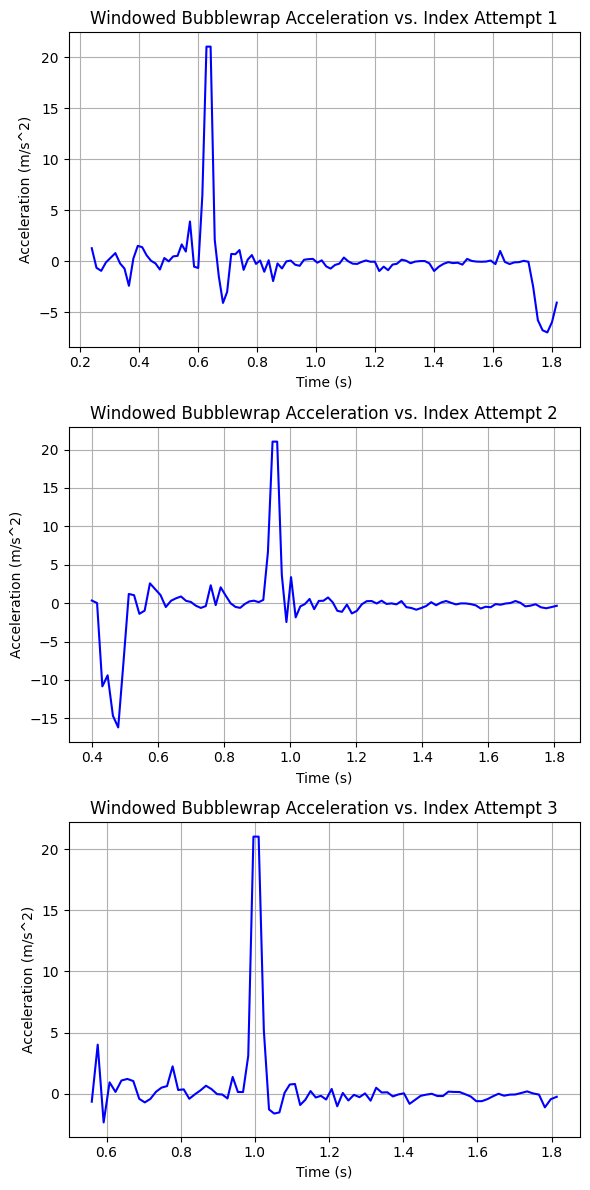

In [8]:
## bubblewrap -- ACCELERATION ##
plots = ['one', 'two', 'three']
fig, axes = plt.subplot_mosaic([['one'], ['two'], ['three']], figsize=(6, 12))
for plot_index in plots:
    index = plots.index(plot_index)
    axes[plot_index].plot(time_windows_bubblewrap[index], accel_windows_bubblewrap[index], label= "Ultrasound data", color="b")
    axes[plot_index].set_title("Windowed Bubblewrap Acceleration vs. Index Attempt {attempt}".format(attempt = plots.index(plot_index) + 1))
    axes[plot_index].set_xlabel("Time (s)")
    axes[plot_index].set_ylabel("Acceleration (m/s^2)")
    axes[plot_index].grid()

plt.tight_layout()
plt.show()

In [9]:
# styrofoam - momentum loss
def momentum(mass, velocity):
  return mass * velocity

m = 489 / 1000 # kg
delta_m = 0.5 / 1000 # kg

p_pre_collision = []
p_post_collision = []
momentum_loss = []
impulse = []

for i in range(3):
  p_pre_collision.append(momentum(m, coeff_linear_pre_collision[i][0]))
  p_post_collision.append(momentum(m, coeff_linear_post_collision[i][0]))
  momentum_loss.append((abs(p_post_collision[i]) - abs(p_pre_collision[i])) * (100 / abs(p_pre_collision[i])))
  impulse.append(p_post_collision[i] - p_pre_collision[i])

  print("trial {0}:\n\tinital velocity: {1} m/s\n\tfinal velocity: {2} m/s\n\tmomentum loss: {3} %\n\timpulse: {4} N*s".format(i, coeff_linear_pre_collision[i][0], coeff_linear_post_collision[i][0], momentum_loss[i], impulse[i]))

trial 0:
	inital velocity: -0.804509006573949 m/s
	final velocity: 0.3103466047964258 m/s
	momentum loss: -61.424098144276115 %
	impulse: 0.5451643939601133 N*s
trial 1:
	inital velocity: -0.8015724670713555 m/s
	final velocity: 0.3077920776651584 m/s
	momentum loss: -61.60146583006837 %
	impulse: 0.5424792623761554 N*s
trial 2:
	inital velocity: -0.745075291439405 m/s
	final velocity: 0.3342478327451449 m/s
	momentum loss: -55.13905284667081 %
	impulse: 0.5277890077262448 N*s


In [10]:
# energy loss
def energy(mass, velocity):
  return 0.5 * mass * (velocity**2)

E_pre_collision = []
E_post_collision = []
energy_loss = []

for i in range(3):
  E_pre_collision.append(energy(m, coeff_linear_pre_collision[i][0]))
  E_post_collision.append(energy(m, coeff_linear_post_collision[i][0]))
  energy_loss.append((abs(E_post_collision[i]) - abs(E_pre_collision[i])) * (100 / abs(E_pre_collision[i])))

  print("trial {0}:\n\tinital velocity: {1} m/s\n\tfinal velocity: {2} m/s\n\tenergy loss: {3} %".format(i + 1, coeff_linear_pre_collision[i][0], coeff_linear_post_collision[i][0], energy_loss[i]))


trial 1:
	inital velocity: -0.804509006573949 m/s
	final velocity: 0.3103466047964258 m/s
	energy loss: -85.11899796017558 %
trial 2:
	inital velocity: -0.8015724670713555 m/s
	final velocity: 0.3077920776651584 m/s
	energy loss: -85.25552573600594 %
trial 3:
	inital velocity: -0.745075291439405 m/s
	final velocity: 0.3342478327451449 m/s
	energy loss: -79.87495420506207 %


In [11]:
## averages
init_velocity = [coeff_linear_pre_collision[0][0], coeff_linear_pre_collision[1][0], coeff_linear_pre_collision[2][0]]
final_velocity = [coeff_linear_post_collision[0][0], coeff_linear_post_collision[1][0], coeff_linear_post_collision[2][0]]
print("averages\n\tinitial vel: {0}\n\tfinal vel: {1}\n\tmomentum loss: {2}\n\timpulse: {3}\n\tenergy loss: {4}".format(np.mean(init_velocity), np.mean(final_velocity), np.mean(momentum_loss), np.mean(impulse), np.mean(energy_loss)))


averages
	initial vel: -0.7837189216949031
	final vel: 0.3174621717355764
	momentum loss: -59.3882056070051
	impulse: 0.5384775546875046
	energy loss: -83.41649263374786


In [12]:
# error propagation

# velocity uncertainties come from covariance matrices

uncertainty_init_v = []
uncertainty_final_v = []
uncertainty_momentum_loss = []
uncertainty_impulse = []
uncertainty_energy_loss = []

def momentum_uncertainty(mass, dm, v, dv):
  return momentum(mass,v) * np.sqrt((dm/mass)**2 + (dv/v)**2)

def energy_uncertainty(mass, dm, v, dv):
  return energy(mass,v) * np.sqrt((dm/mass)**2 + (2*dv/v)**2)

def energy_loss_uncertainty(mass, dm, v_i, dv_i, v_f, dv_f):
  E_i = energy(mass, v_i)
  E_f = energy(mass, v_f)
  return ((E_f - E_i) / E_i) * np.sqrt((np.sqrt(energy_uncertainty(mass, dm, v_i, dv_i)**2 + energy_uncertainty(mass, dm, v_f, dv_f)**2) / (E_f - E_i))**2 + (energy_uncertainty(mass, dm, v_i, dv_i) / E_i)**2)

def momentum_loss_uncertainty(mass, dm, v_i, dv_i, v_f, dv_f):
  p_i = momentum(mass, v_i)
  p_f = momentum(mass, v_f)
  return ((p_f - p_i) / p_i) * np.sqrt((np.sqrt(momentum_uncertainty(mass, dm, v_i, dv_i)**2 + momentum_uncertainty(mass, dm, v_f, dv_f)**2) / (p_f - p_i))**2 + (momentum_uncertainty(mass, dm, v_i, dv_i) / p_i)**2)

def impulse_uncertainty(mass, dm, v_i, dv_i, v_f, dv_f):
  return np.sqrt((momentum_uncertainty(mass, dm, v_i, dv_i))**2 + (momentum_uncertainty(mass, dm, v_f, dv_f))**2)

print("uncertainties:")
for i in range(3):
  v_init = coeff_linear_pre_collision[i][0]
  v_final = coeff_linear_post_collision[i][0]
  delta_v_init = cov_linear_pre_collision[i][0,0]
  delta_v_final = cov_linear_post_collision[i][0,0]

  uncertainty_init_v.append(delta_v_init)
  uncertainty_final_v.append(delta_v_final)
  uncertainty_momentum_loss.append(impulse_uncertainty(m, delta_m, v_init, delta_v_init, v_final, delta_v_final))
  uncertainty_impulse.append(momentum_loss_uncertainty(m, delta_m, v_init, delta_v_init, v_final, delta_v_final))
  uncertainty_energy_loss.append(energy_loss_uncertainty(m, delta_m, v_init, delta_v_init, v_final, delta_v_final))

  print("trial {0}:\n\tinital velocity: ±{1} m/s\n\tfinal velocity: ±{2} m/s\n\tmomentum loss: ±{3} %\n\timpulse ±{4} N*s\n\tenergy loss: ±{5} %".format(i + 1, uncertainty_init_v[i-1], uncertainty_final_v[i-1], uncertainty_momentum_loss[i-1], uncertainty_impulse[i-1], uncertainty_energy_loss[i-1]))
  

uncertainties:
trial 1:
	inital velocity: ±0.0006550665964250533 m/s
	final velocity: ±1.67093820916848e-05 m/s
	momentum loss: ±0.0005371814888065289 %
	impulse ±-0.002268338607290935 N*s
	energy loss: ±-0.0025297793494232046 %
trial 2:
	inital velocity: ±0.0006550665964250533 m/s
	final velocity: ±1.67093820916848e-05 m/s
	momentum loss: ±0.0005371814888065289 %
	impulse ±-0.002268338607290935 N*s
	energy loss: ±-0.0025297793494232046 %
trial 3:
	inital velocity: ±0.00012878576002933127 m/s
	final velocity: ±1.2950175251776081e-05 m/s
	momentum loss: ±0.00043395818279887583 %
	impulse ±-0.0018104491363493797 N*s
	energy loss: ±-0.0014165462961915776 %


In [13]:
# uncertainty in averages

def avg_uncertainty(l):
  return np.sqrt(np.dot(l, l)) / 3

print("average uncertainties:")
print("\tinitial vel: ±{0} m/s\n\tfinal vel: ±{1} m/s\n\tmomentum loss: ±{2} %\n\timpulse: ±{3} N*s\n\tenergy loss: ±{4} %".format(avg_uncertainty(uncertainty_init_v), avg_uncertainty(uncertainty_final_v), 
                                                                                                                             avg_uncertainty(uncertainty_momentum_loss), avg_uncertainty(uncertainty_impulse), 
                                                                                                                             avg_uncertainty(uncertainty_energy_loss)))


average uncertainties:
	initial vel: ±0.0002705139315536915 m/s
	final vel: ±8.068809903127929e-06 m/s
	momentum loss: ±0.0002777970801985619 %
	impulse: ±0.0012046890628269436 N*s
	energy loss: ±0.0011866962229168069 %
